In [1]:
import numpy as np
import pandas as pd

# For visualizations
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import gensim
import pyLDAvis
import textblob
import spacy

# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

# Importing dataset
df=pd.read_csv('/Users/hgardner/Desktop/toxicity/data/preprocessed_data/cat_desc.csv')

In [2]:
df.shape

(721454, 3)

## Text Stat

Dale Chall Score: https://en.wikipedia.org/wiki/Dale%E2%80%93Chall_readability_formula, 0-9.9 scale; the higher the score, the higher the level of the reader 

Flesch Reading Score: https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests, 0-100 scale; the higher the score, the easier the text is to read 

Gunning Fog Index: https://en.wikipedia.org/wiki/Gunning_fog_index 

Instructions: https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/ 

In [3]:
import textstat

df['dale_chall_score']=df['description'].apply(lambda x: textstat.dale_chall_readability_score(x))
df['flesch_reading_ease']=df['description'].apply(lambda x: textstat.flesch_reading_ease(x))
df['gunning_fog']=df['description'].apply(lambda x: textstat.gunning_fog(x))


In [4]:
print('Dale Chall Score of Descriptions: Mean',df['dale_chall_score'].mean())
print('Dale Chall Score of Descriptions: Min',df['dale_chall_score'].min())
print('Dale Chall Score of Descriptions: Median',df['dale_chall_score'].median())
print('Dale Chall Score of Descriptions: Max',df['dale_chall_score'].max())
print('Dale Chall Score of Descriptions: Mode',df['dale_chall_score'].mode())

print('Flesch Reading Score of Descriptions: Mean',df['flesch_reading_ease'].mean())
print('Flesch Reading Score of Descriptions: Min',df['flesch_reading_ease'].min())
print('Flesch Reading Score of Descriptions: Median',df['flesch_reading_ease'].median())
print('Flesch Reading Score of Descriptions: Max',df['flesch_reading_ease'].max())
print('Flesch Reading Score of Descriptions: Mode',df['flesch_reading_ease'].mode())

print('Gunning Fog Index of Descriptions: Mean',df['gunning_fog'].mean())
print('Gunning Fog Index of Descriptions: Min ',df['gunning_fog'].min())
print('Gunning Fog Index of Descriptions: Median',df['gunning_fog'].median())
print('Gunning Fog Index of Descriptions: Max ',df['gunning_fog'].max())
print('Gunning Fog Index of Descriptions: Mode',df['gunning_fog'].mode())



Dale Chall Score of Descriptions: Mean 15.269600736776187
Dale Chall Score of Descriptions: Min 0.0
Dale Chall Score of Descriptions: Median 11.78
Dale Chall Score of Descriptions: Max 666.87
Dale Chall Score of Descriptions: Mode 0    35.27
Name: dale_chall_score, dtype: float64
Flesch Reading Score of Descriptions: Mean 35.63650015094354
Flesch Reading Score of Descriptions: Min -1783.3
Flesch Reading Score of Descriptions: Median 36.62
Flesch Reading Score of Descriptions: Max 206.84
Flesch Reading Score of Descriptions: Mode 0    36.62
Name: flesch_reading_ease, dtype: float64
Gunning Fog Index of Descriptions: Mean 14.071123079271572
Gunning Fog Index of Descriptions: Min  0.0
Gunning Fog Index of Descriptions: Median 15.26
Gunning Fog Index of Descriptions: Max  145.22
Gunning Fog Index of Descriptions: Mode 0    0.4
Name: gunning_fog, dtype: float64


In [5]:
df['word_count']=df['description'].apply(lambda x: textstat.lexicon_count(x, removepunct=True))

In [6]:
print('Word Count of Descriptions: Mean',df['word_count'].mean())
print('Word Count of Descriptions: Min ',df['word_count'].min())
print('Word Count of Descriptions: Median',df['word_count'].median())
print('Word Count of Descriptions: Max ',df['word_count'].max())


Word Count of Descriptions: Mean 85.8066945363114
Word Count of Descriptions: Min  0
Word Count of Descriptions: Median 66.0
Word Count of Descriptions: Max  1415


## Visualizations of Lexicon Word Count

(0.0, 20000.0)

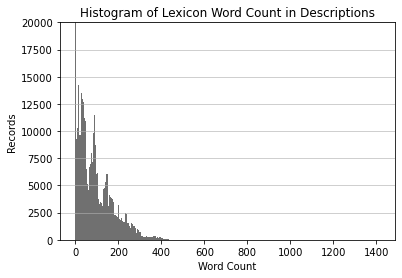

In [7]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=df['word_count'], bins='auto', color='#333333',
                            alpha=0.7, rwidth=1)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Word Count')
plt.ylabel('Records')
plt.title('Histogram of Lexicon Word Count in Descriptions')
# Set a clean upper y-axis limit.
plt.ylim(ymax=20000)

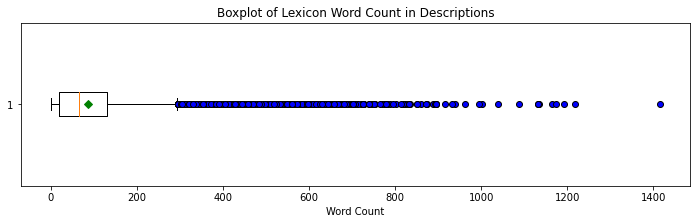

In [8]:
red_circle = dict(markerfacecolor='blue', marker='o', )
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')
plt.figure(figsize=(12,3))
plt.boxplot(x=df['word_count'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape)
plt.xlabel('Word Count')
plt.title('Boxplot of Lexicon Word Count in Descriptions')
plt.show()

In [9]:
df['reading_time']=df['description'].apply(lambda x: textstat.reading_time(x, ms_per_char=14.69))
print('Mean Reading Time: Mean',df['reading_time'].mean())

Mean Reading Time: Mean 7.179803854424767


## Title EDA

In [10]:
# Importing dataset
df_title=pd.read_csv('/Users/hgardner/Desktop/toxicity/data/preprocessed_data/cat_title.csv')

In [11]:
df_title['dale_chall_score']=df_title['title'].apply(lambda x: textstat.dale_chall_readability_score(x))
df_title['flesch_reading_ease']=df_title['title'].apply(lambda x: textstat.flesch_reading_ease(x))
df_title['word_count']=df_title['title'].apply(lambda x: textstat.lexicon_count(x, removepunct=True))
df_title['reading_time']=df_title['title'].apply(lambda x: textstat.reading_time(x, ms_per_char=14.69))

In [12]:
print('Dale Chall Score : Mean',df_title['dale_chall_score'].mean())
print('Dale Chall Score: Min',df_title['dale_chall_score'].min())
print('Dale Chall Score: Median',df_title['dale_chall_score'].median())
print('Dale Chall Score: Max',df_title['dale_chall_score'].max())

print('Flesch Reading Score: Mean',df_title['flesch_reading_ease'].mean())
print('Flesch Reading Score: Min',df_title['flesch_reading_ease'].min())
print('Flesch Reading Score: Median',df_title['flesch_reading_ease'].median())
print('Flesch Reading Score: Max',df_title['flesch_reading_ease'].max())

print('Word Count of Descriptions: Mean',df_title['word_count'].mean())
print('Word Count of Descriptions: Min ',df_title['word_count'].min())
print('Word Count of Descriptions: Median',df_title['word_count'].median())
print('Word Count of Descriptions: Max ',df_title['word_count'].max())

print('Mean Reading Time: Mean',df_title['reading_time'].mean())

Dale Chall Score : Mean 13.82108173483603
Dale Chall Score: Min 0.0
Dale Chall Score: Median 13.36
Dale Chall Score: Max 161.59
Flesch Reading Score: Mean 45.283108842110614
Flesch Reading Score: Min -1147.79
Flesch Reading Score: Median 50.5
Flesch Reading Score: Max 206.84
Word Count of Descriptions: Mean 8.581947359126282
Word Count of Descriptions: Min  0
Word Count of Descriptions: Median 6.0
Word Count of Descriptions: Max  383
Mean Reading Time: Mean 0.7278050127891331


In [13]:
print(df_title[df_title.flesch_reading_ease < -1000])

                         bibid  \
31489       (MiAaPQ)EBC4860829   
470602   (CKB)5590000000557983   
470604   (CKB)5590000000557985   
470607   (CKB)5590000000557988   
2114819     (YBPDDA)ebc4860829   
4517870     (OCoLC)ocm34477177   

                                                     title  \
31489              Deterritorializing/Reterritorializing :   
470602   HTML:Mason:Component:run('HTML:Mason:Component...   
470604   HTML:Mason:Component:run('HTML:Mason:Component...   
470607   HTML:Mason:Component:run('HTML:Mason:Component...   
2114819            Deterritorializing/reterritorializing :   
4517870  Modest₋Witness@Second₋Millennium.FemaleMan₋Mee...   

                                               clean_title  dale_chall_score  \
31489            ['deterritorializingreterritorializing ']             35.27   
470602   ['htmlmasoncomponentrunhtmlmasoncomponentfileb...            114.22   
470604   ['htmlmasoncomponentrunhtmlmasoncomponentfileb...            114.22   
470607

In [14]:
flesch_123 = df_title[df_title.flesch_reading_ease > 122]

In [15]:
flesch_123.head(50)

,bibid,title,clean_title,dale_chall_score,flesch_reading_ease,word_count,reading_time
246191,(CKB)5590000000551800,(((,[''],0.0,206.84,0,0.04
3429094,(OCoLC)ocm79446449,[ ... ] :,[' '],0.0,206.84,0,0.09
3806519,(OCoLC)ocn150473513,<>.,[''],0.0,206.84,0,0.04
5122643,(OCoLC)ocm10054736,/,[''],0.0,206.84,0,0.01
5251525,(OCoLC)ocm07641126,;,[''],0.0,206.84,0,0.01


(0.0, 500000.0)

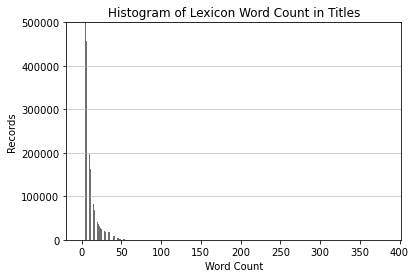

In [16]:
#title histogram
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=df_title['word_count'], bins=750, color='#333333',
                            alpha=0.7, rwidth=1)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Word Count')
plt.ylabel('Records')
plt.title('Histogram of Lexicon Word Count in Titles')
# Set a clean upper y-axis limit.
plt.ylim(ymax=500000)

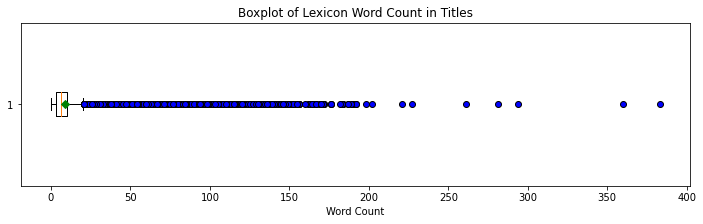

In [17]:
#title box plot
red_circle = dict(markerfacecolor='blue', marker='o', )
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')
plt.figure(figsize=(12,3))
plt.boxplot(x=df_title['word_count'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape)
plt.xlabel('Word Count')
plt.title('Boxplot of Lexicon Word Count in Titles')
plt.show()

## Subject EDA

In [18]:
df_sub = pd.read_csv('/Users/hgardner/Desktop/toxicity/data/parsed data files/raw_subject.csv')

In [19]:
df_sub.shape

(3022612, 2)

In [20]:
df_sub.head()

,bibid,subject
0,(OCoLC)557588801,Astronomy.
1,(OCoLC)1256541466,Black people in art
2,(OCoLC)48418774,Cotton manufacture
3,(OCoLC)39033407,"Cooking, American"
4,(OCoLC)32911699,Rock musicians


In [21]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3022612 entries, 0 to 3022611
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   bibid    object
 1   subject  object
dtypes: object(2)
memory usage: 46.1+ MB


In [22]:
100*3022612/5481440

55.142663241775885

In [23]:
df_sub.select_dtypes([object]).nunique()

bibid      2948473
subject     151392
dtype: int64

In [24]:
freq_table = pd.crosstab(index=df_sub["subject"], columns="count")

In [25]:
freq_table

col_0,count
subject,
\tPsychoanalysis and literature.,1
"Diplomatic and consular service, Spanish.",1
Monuments,1
Nilpotent Lie groups.,1
!Cu-cut!,1
...,...
ʻTsv (The Hebrew word),1
ʼBrug-pa (Sect),1
קריירה,1


In [26]:
freq_table = freq_table.sort_values(by="count", ascending=False)

In [27]:
#top 50 subject terms in the first term position
freq_table.head(50)

col_0,count
subject,
Law,17379
Indians of North America,15386
Women,12405
Geology,11621
Railroads,9856
"Sermons, English",9580
Piano music.,8664
Education,7935
"World War, 1939-1945",7863


In [28]:
freq_table.reset_index(inplace=True)
freq_table = freq_table.rename(columns = {'index':'new column name'})

In [29]:
freq_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151392 entries, 0 to 151391
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   subject  151392 non-null  object
 1   count    151392 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


/var/folders/2g/1_zwfkdj3mvcdhj4kjs8zt3h0000gn/T/ipykernel_95515/4258922747.py:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


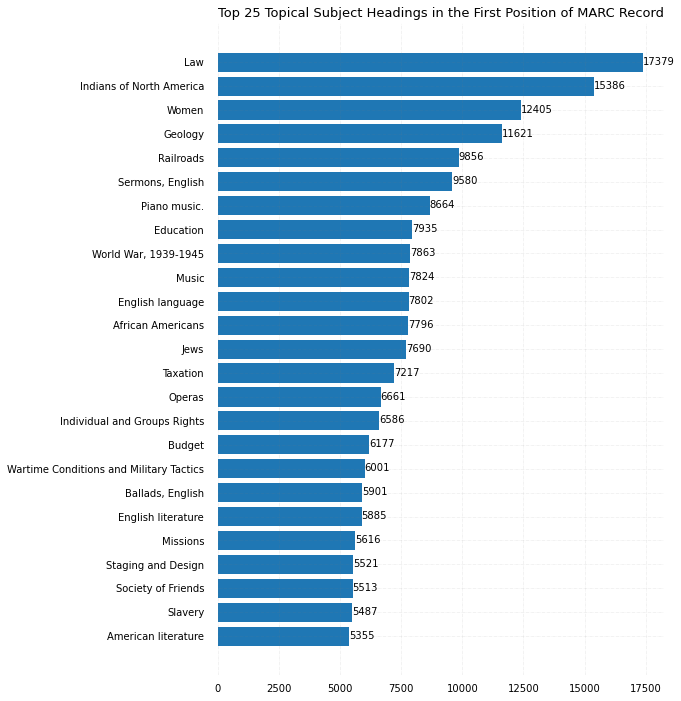

In [30]:

subject = freq_table['subject'].head(25)
freq_ct = freq_table['count'].head(25)
 
# Figure Size
fig, ax = plt.subplots(figsize =(8, 12))
 
# Horizontal Bar Plot
ax.barh(subject, freq_ct)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10,
             color ='black')
 
# Add Plot Title
ax.set_title('Top 25 Topical Subject Headings in the First Position of MARC Record',
             loc ='left', fontsize = 13 )
 
# Show Plot
plt.show()

In [31]:
print(freq_ct.sum())
(freq_ct.sum()/5481440)*100

203721


3.716559882074783

## Publication Date

In [32]:
df_pub = pd.read_csv('/Users/hgardner/Desktop/toxicity/data/parsed data files/raw_pubdate.csv')

#removing non-numeric characters
df_pub['pubdate'] = df_pub['pubdate'].str.extract('(\d+)', expand=False)

#removing month and day where present
df_pub['year'] = df_pub['pubdate'].str[:4]


<>:4: DeprecationWarning: invalid escape sequence \d
<>:4: DeprecationWarning: invalid escape sequence \d
/var/folders/2g/1_zwfkdj3mvcdhj4kjs8zt3h0000gn/T/ipykernel_95515/132339678.py:4: DeprecationWarning: invalid escape sequence \d
  df_pub['pubdate'] = df_pub['pubdate'].str.extract('(\d+)', expand=False)


In [33]:
df_pub['pubdate'].isnull().sum()

5601

In [34]:
df_pub.dropna(inplace=True)


In [35]:
df_pub.head()

,bibid,pubdate,year
0,(OCoLC)557588801,1828,1828
1,(OCoLC)13243571,1917,1917
2,(OCoLC)39033407,1998,1998
3,(OCoLC)32911699,1995,1995
4,(OCoLC)46476184,1881,1881


In [36]:
df_pub['year'] = df_pub['year'].astype(int)

In [37]:
#sanity check
df_pub.head(50)

,bibid,pubdate,year
0,(OCoLC)557588801,1828,1828
1,(OCoLC)13243571,1917,1917
2,(OCoLC)39033407,1998,1998
3,(OCoLC)32911699,1995,1995
4,(OCoLC)46476184,1881,1881
5,(OCoLC)14013404,1901,1901
6,(OCoLC)49300690,2002,2002
7,(OCoLC)48557504,2002,2002
8,(OCoLC)47192114,2001,2001
9,(OCoLC)1039917548,2012,2012


In [38]:
year_table = pd.crosstab(index=df_pub["year"], columns="count")
year_table.reset_index(inplace=True)


In [39]:
year_table = year_table.sort_values(by="count", ascending=False)

In [40]:
year_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091 entries, 922 to 1090
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    1091 non-null   int64
 1   count   1091 non-null   int64
dtypes: int64(2)
memory usage: 25.6 KB


In [41]:
year_table.head()

col_0,year,count
922,2000,45402
921,1999,44837
920,1998,43199
932,2010,42382
929,2007,41620


/var/folders/2g/1_zwfkdj3mvcdhj4kjs8zt3h0000gn/T/ipykernel_95515/4057432388.py:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


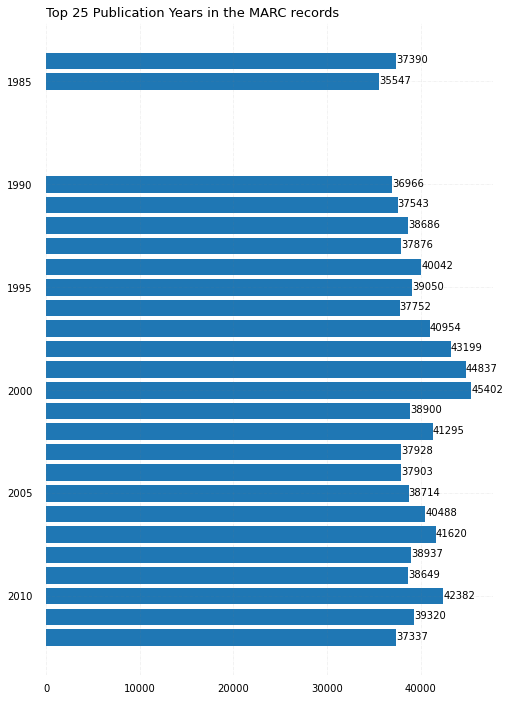

In [42]:
year = year_table['year'].head(25)
yr_freq_ct = year_table['count'].head(25)
 
# Figure Size
fig, ax = plt.subplots(figsize =(8, 12))
 
# Horizontal Bar Plot
ax.barh(year, yr_freq_ct)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10,
             color ='black')
 
# Add Plot Title
ax.set_title('Top 25 Publication Years in the MARC records',
             loc ='left', fontsize = 13 )
 
# Show Plot
plt.show()

In [43]:
year_table['year'] = year_table['year'].astype(int)

In [44]:
year_table = year_table.sort_values(by="year", ascending=True)

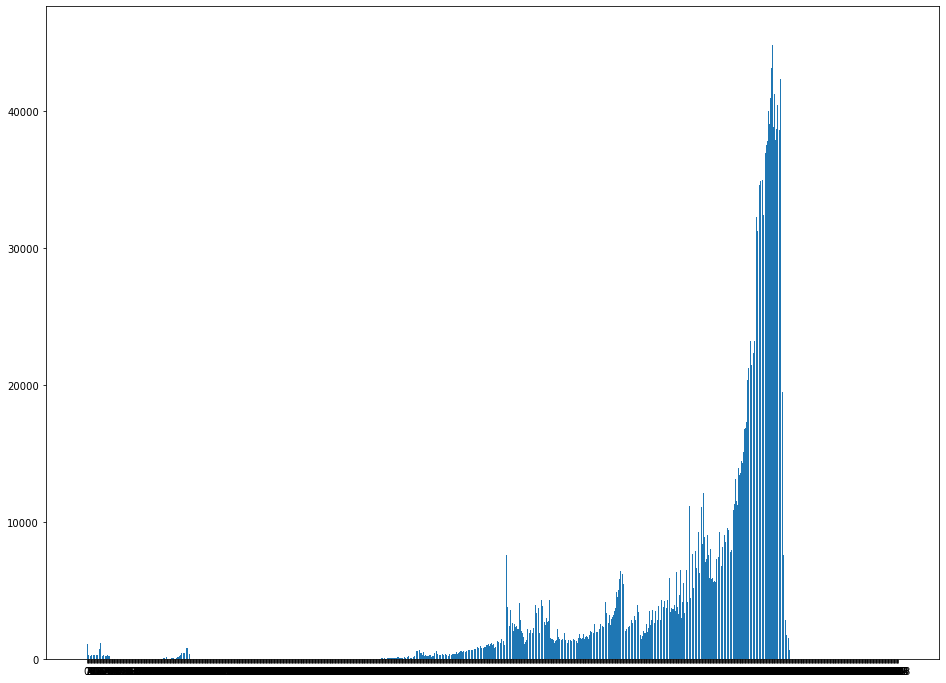

In [45]:
# Make a random dataset:
height = year_table['count']
bars = year_table['year']
y_pos = np.arange(len(bars))
# Figure Size
fig, ax = plt.subplots(figsize =(16, 12))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

In [55]:
df_pub['year'] = df_pub['year'].astype(int)
df_pub = df_pub.sort_values(by='year', ascending=True)

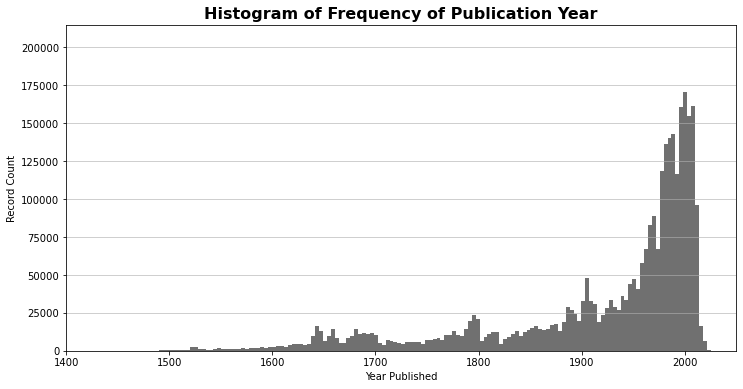

In [60]:
# An "interface" to matplotlib.axes.Axes.hist() method
# Figure Size
df_pub2 = df_pub.loc[df_pub['year'] > 1400]
fig, ax = plt.subplots(figsize =(12, 6))
n, bins, patches = plt.hist(x=df_pub2['year'], bins=2000, color='#333333',
                            alpha=0.7, rwidth=1)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Year Published')
plt.ylabel('Record Count')
# Add Plot Title
ax.set_title('Histogram of Frequency of Publication Year',
             loc ='center', fontsize = 16, fontweight='bold')
# Set a clean upper y-axis limit.
plt.ylim(ymax=215000)
plt.xlim(1400,2050)

every_nth = 50
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(True)

In [64]:
600/24


25.0